# Setup

In [1]:
# Import packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature engineering
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler

# Models
from sklearn.ensemble import RandomForestClassifier

# Utilities
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
directory = "/mnt/hd2/database/churn-dataset/" 
name = "churn_data.csv"

# Load dataset
dataset = pd.read_csv(os.path.join(directory, name))
print("Dataset:", dataset.shape)
dataset.head()

Dataset: (27000, 31)


user  churn   age housing  credit_score  deposits  withdrawal  \
0  55409      0  37.0      na           NaN         0           0   
1  23547      0  28.0       R         486.0         0           0   
2  58313      0  35.0       R         561.0        47           2   
3   8095      0  26.0       R         567.0        26           3   
4  61353      1  27.0      na           NaN         0           0   

   purchases_partners  purchases  cc_taken  cc_recommended  cc_disliked  \
0                   0          0         0               0            0   
1                   1          0         0              96            0   
2                  86         47         0             285            0   
3                  38         25         0              74            0   
4                   2          0         0               0            0   

   cc_liked  cc_application_begin  app_downloaded  web_user  app_web_user  \
0         0                     0               1         1             1   
1         0                     5               1         1             1   
2         0                     9               1         0             0   
3         0                    26               1         0             0   
4         0                     0               1         1             1   

   ios_user  android_user  registered_phones  payment_type  waiting_4_loan  \
0         1             0                  0     Bi-Weekly               0   
1         1             0                  0        Weekly               0   
2         0             1                  2  Semi-Monthly               0   
3         0             1                  0     Bi-Weekly               0   
4         0             1                  0     Bi-Weekly               0   

   cancelled_loan  received_loan  rejected_loan zodiac_sign  \
0               0              0              0         Leo   
1               0              0              0         Leo   
2               0              0              0   Capricorn   
3               0              0              0   Capricorn   
4               0              0              0       Aries   

   left_for_two_month_plus  left_for_one_month  rewards_earned  reward_rate  \
0                        1                   0             NaN         0.00   
1                        0                   0            44.0         1.47   
2                        1                   0            65.0         2.17   
3                        0                   0            33.0         1.10   
4                        1                   0             1.0         0.03   

   is_referred  
0            0  
1            1  
2            0  
3            1  
4            0

# Data Preprocessing

In [4]:
# Get statistical analysis on dataset
dataset.describe()

user         churn           age  credit_score      deposits  \
count  27000.000000  27000.000000  26996.000000  18969.000000  27000.000000   
mean   35422.702519      0.413852     32.219921    542.944225      3.341556   
std    20321.006678      0.492532      9.964838     61.059315      9.131406   
min        1.000000      0.000000     17.000000      2.000000      0.000000   
25%    17810.500000      0.000000     25.000000    507.000000      0.000000   
50%    35749.000000      0.000000     30.000000    542.000000      0.000000   
75%    53244.250000      1.000000     37.000000    578.000000      1.000000   
max    69658.000000      1.000000     91.000000    838.000000     65.000000   

         withdrawal  purchases_partners     purchases      cc_taken  \
count  27000.000000        27000.000000  27000.000000  27000.000000   
mean       0.307000           28.062519      3.273481      0.073778   
std        1.055416           42.219686      8.953077      0.437299   
min        0.000000            0.000000      0.000000      0.000000   
25%        0.000000            0.000000      0.000000      0.000000   
50%        0.000000            9.000000      0.000000      0.000000   
75%        0.000000           43.000000      1.000000      0.000000   
max       29.000000         1067.000000     63.000000     29.000000   

       cc_recommended   cc_disliked      cc_liked  cc_application_begin  \
count    27000.000000  27000.000000  27000.000000          27000.000000   
mean        92.625778      0.050630      0.013111              8.197852   
std         88.869343      0.871366      0.238158             12.497243   
min          0.000000      0.000000      0.000000              0.000000   
25%         10.000000      0.000000      0.000000              0.000000   
50%         65.000000      0.000000      0.000000              4.000000   
75%        164.000000      0.000000      0.000000             11.000000   
max        522.000000     65.000000     27.000000            263.000000   

       app_downloaded      web_user  app_web_user      ios_user  android_user  \
count    27000.000000  27000.000000  27000.000000  27000.000000  27000.000000   
mean         0.952481      0.606074      0.561741      0.393926      0.587259   
std          0.212749      0.488628      0.496183      0.488628      0.492336   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          1.000000      0.000000      0.000000      0.000000      0.000000   
50%          1.000000      1.000000      1.000000      0.000000      1.000000   
75%          1.000000      1.000000      1.000000      1.000000      1.000000   
max          1.000000      1.000000      1.000000      1.000000      1.000000   

       registered_phones  waiting_4_loan  cancelled_loan  received_loan  \
count       27000.000000    27000.000000    27000.000000   27000.000000   
mean            0.420926        0.001296        0.018815       0.018185   
std             0.912831        0.035981        0.135873       0.133623   
min             0.000000        0.000000        0.000000       0.000000   
25%             0.000000        0.000000        0.000000       0.000000   
50%             0.000000        0.000000        0.000000       0.000000   
75%             0.000000        0.000000        0.000000       0.000000   
max             5.000000        1.000000        1.000000       1.000000   

       rejected_loan  left_for_two_month_plus  left_for_one_month  \
count   27000.000000             27000.000000        27000.000000   
mean        0.004889                 0.173444            0.018074   
std         0.069751                 0.378638            0.133222   
min         0.000000                 0.000000            0.000000   
25%         0.000000                 0.000000            0.000000   
50%         0.000000                 0.000000            0.000000   
75%         0.000000                 0.000000            0.000000   
max         1.000000         

In [5]:
dataset.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned      

**Note:**

- Some of the numerical features have a very wide range. Feature normalization might be required.
- Features `age`, `credit_score` and `rewards_earned` has NaNs. Handle before modeling.

## Handle NaNs

In [6]:
dataset[["age", "credit_score", "rewards_earned"]].isna().sum()

age                  4
credit_score      8031
rewards_earned    3227
dtype: int64

In [7]:
# `Age` column has very few NaNs
dataset["age"].fillna(int(dataset["age"].mode()), inplace=True)

# `credit_score` and `rewards_earned` column has a lot of NaNs
dataset["credit_score"].fillna(dataset["credit_score"].mean(), inplace=True)
dataset["rewards_earned"].fillna(dataset["rewards_earned"].mean() + dataset["rewards_earned"].std(), inplace=True)

In [8]:
dataset.isnull().any()

user                       False
churn                      False
age                        False
housing                    False
credit_score               False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned             False
reward_rate                False
is_referre

## Data Distribution

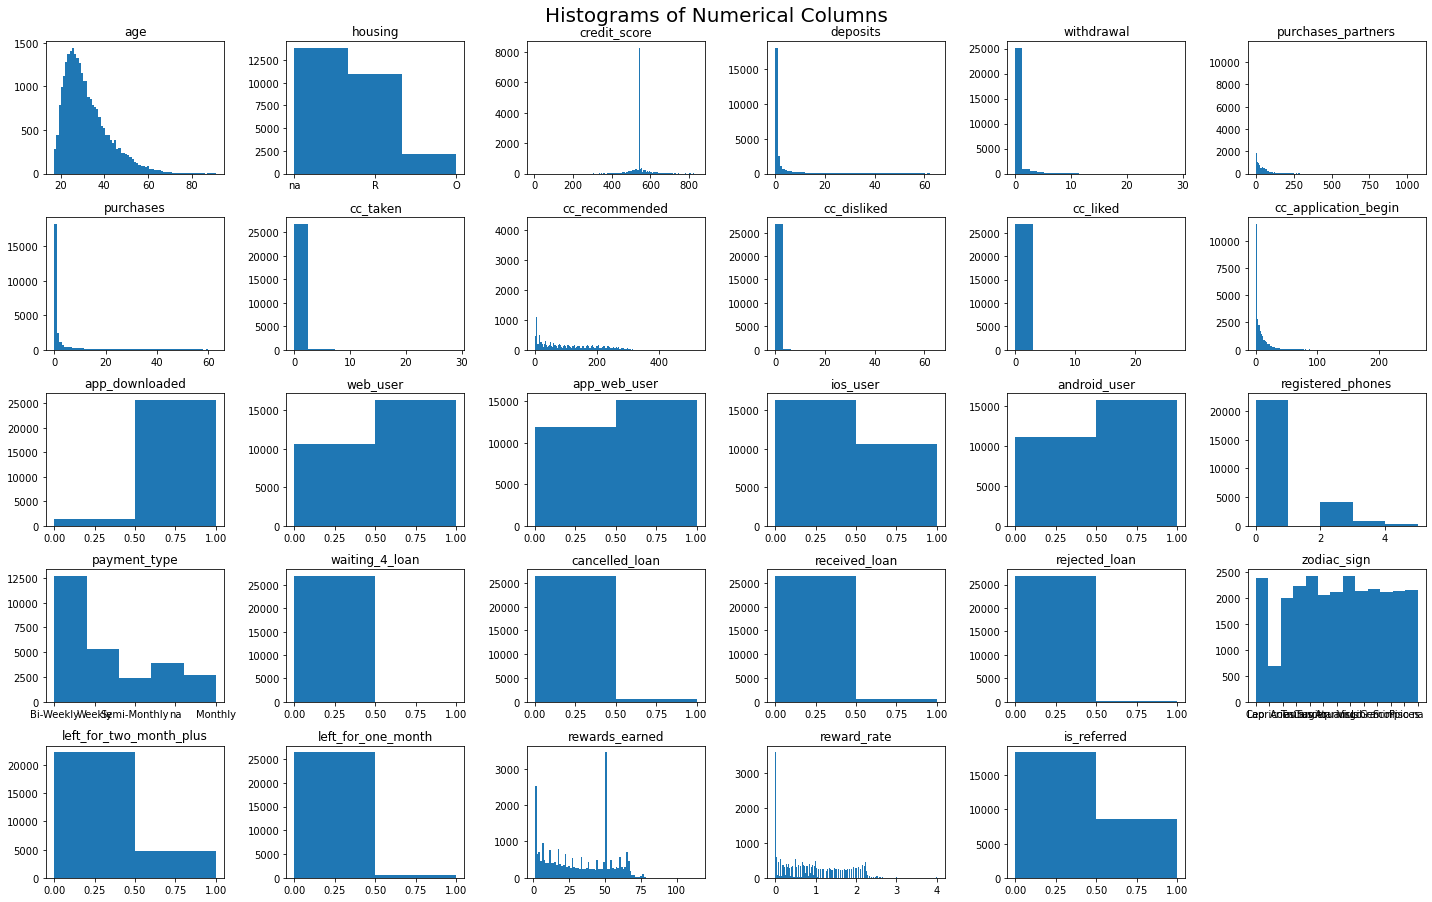

In [9]:
# Plot frequency distribution
dataset2 = dataset.drop(columns=["user", "churn"])

fig = plt.figure(figsize=(20, 15))

plt.suptitle("Histograms of Numerical Columns", fontsize=20)

# Plot a subplot for each feature column
for i in range(1, dataset2.shape[1] + 1):
    # Set subplot
    plt.subplot(6, 6, i)
    
    # Get current axes and set subplot metadata
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    
    # Plot
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i - 1], bins=vals)

# Adjust padding
plt.tight_layout(rect=[0, 0, 1, 1])

**Note:**

- Some features have skewed distribution like `cancelled_loan`, `left_from_one_month`, `cc_taken`, `waiting_4_loan` etc.
- Features likes `zodiac_sign` are fairly distributed.

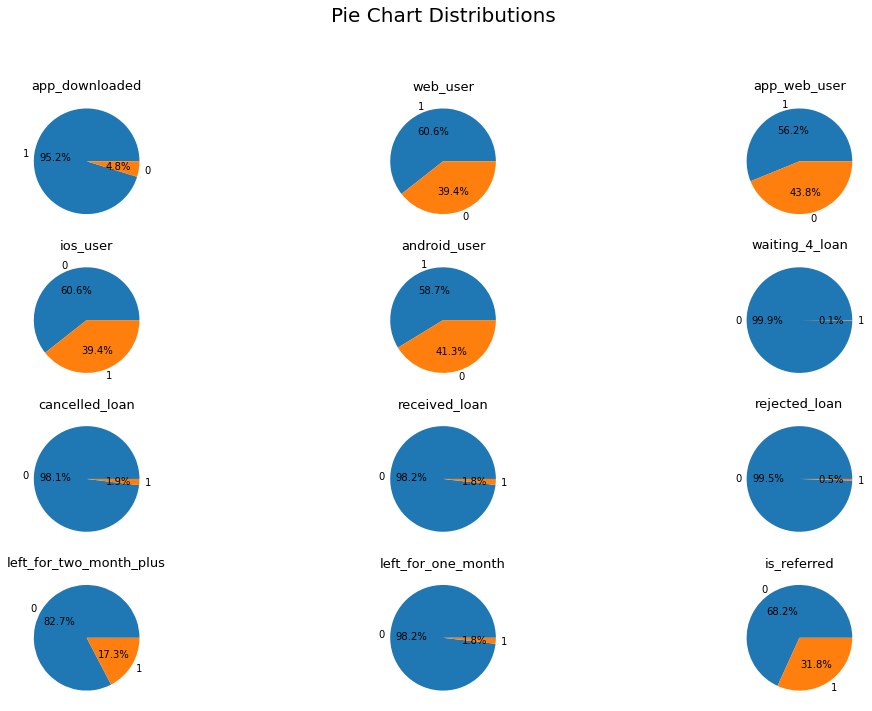

In [10]:
# Plot only binary features - check prevalence
binary_columns = [col for col in dataset.columns if len(dataset[col].unique()) == 2 and col not in ["user", "churn"]]

dataset3 = dataset[binary_columns]

fig = plt.figure(figsize=(15, 15))
plt.suptitle("Pie Chart Distributions", fontsize=20)

# Iteratively plot piecharts
for i in range(1, dataset3.shape[1] + 1):
    # Set subplot
    plt.subplot(6, 3, i)
    
    # Get axes and set metadata
    f = plt.gca()
    f.set_title(dataset3.columns.values[i - 1], fontsize=13)
    
    # Plot
    values = dataset3.iloc[:, i - 1].value_counts(normalize=True).values
    index = dataset3.iloc[:, i - 1].value_counts(normalize=True).index
    plt.pie(values, labels=index, autopct="%1.1f%%")

# Adjust padding
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

**Note:**

- Binary features like `cancelled_load`, `received_loan`, `rejected_loan` etc., are highly skewed.
- Very few balanced features like `app_web_user`, `ios_user` and `android_user`.
- Some features pair indicate the same information in a different manner like `android_user` and `ios_user`.

<AxesSubplot:title={'center':'Correlation with Dependent Variable'}>

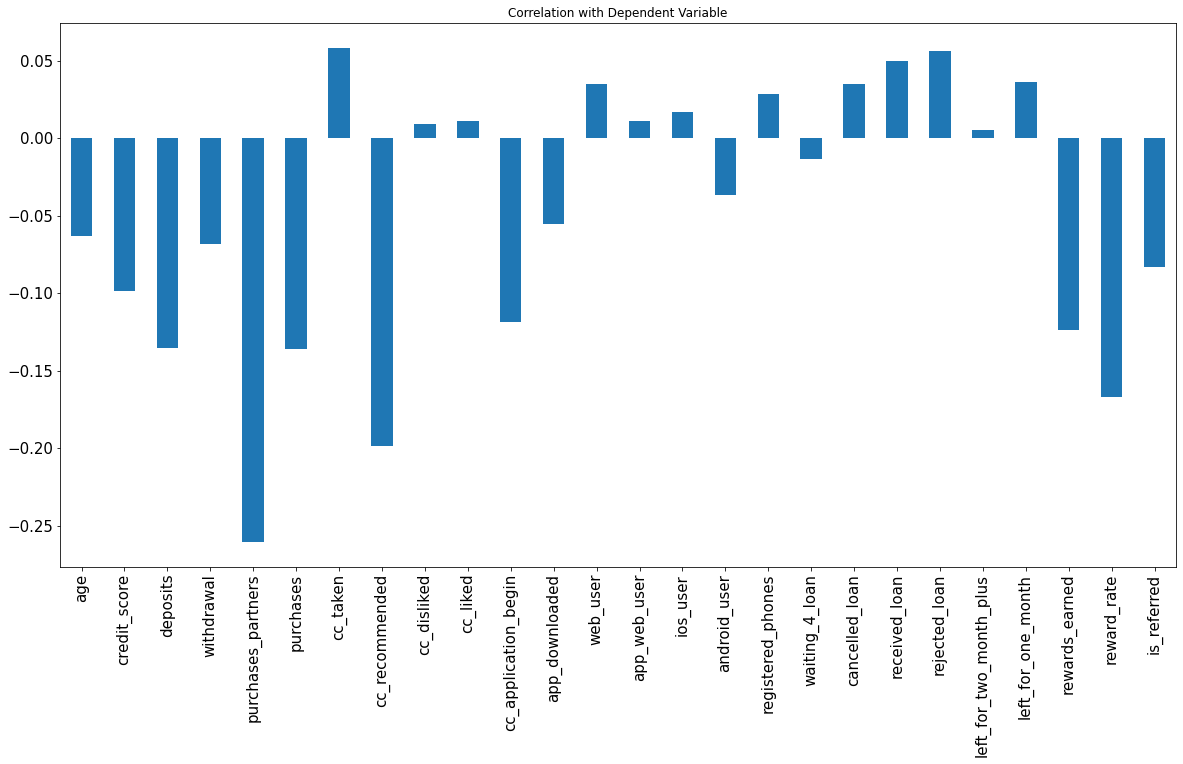

In [11]:
# Plot pair wise correlation with the dependent (target) variable
numeric_columns = [col for col in dataset.columns if type(dataset[col]) != "object" and col not in ["user", "churn"]]

dataset4 = dataset[numeric_columns]

dataset4.corrwith(dataset.churn, axis=0).plot.bar(
    figsize=(20,10),
    title="Correlation with Dependent Variable",
    fontsize=15)

**Note:**

- Features like `cc_taken`, `web_user`, `rejected_loan` are slightly positively related to the dependent variable `churn`.
- Features like `purchases_partners`, `cc_recommended` and `reward_rate` are strongly negatively related to the dependent variable.

## Feature Correlation

<AxesSubplot:>

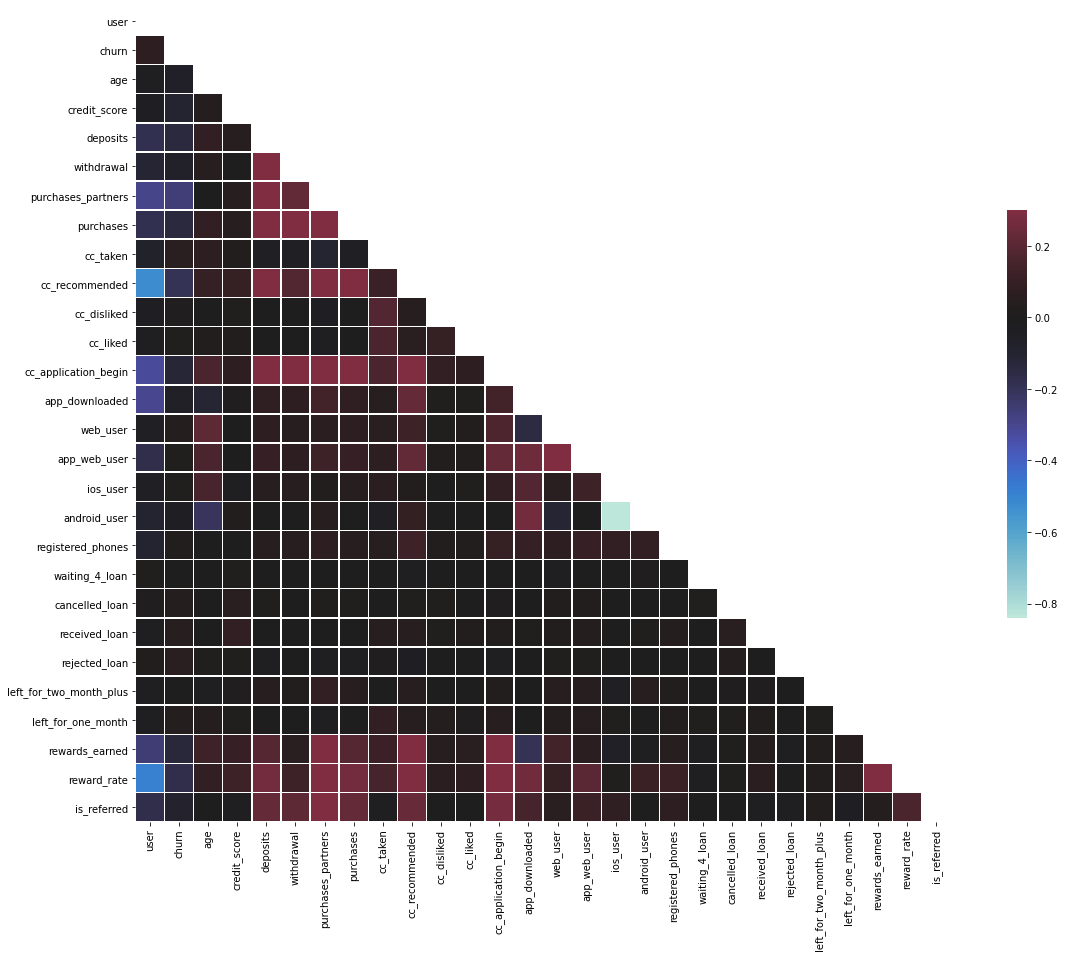

In [12]:
# Compute correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)

# Get indices of the upper triangle
upper_triangle_indices = np.triu_indices_from(mask)

# Set mask to remove upper traingle (redundant piece of information)
mask[upper_triangle_indices] = True

# Plot the heatmap with mask
plt.figure(figsize=(20, 15))
sns.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Note:**

- As expected `ios_user` and `android_user` is showing high negatively correlation. We might wanna combine the features into a single column.
- Positive correlation are small or close to none for most features.

## Encode Categorical Features

In [13]:
# Get categorical feature list
cats = [col for col in dataset.columns if dataset[col].dtype == "object"]
print("Categorical Features:", cats)

# Instantiate encoder
feature_encoder = OrdinalEncoder(dtype=np.int64)

# Encode features
dataset[cats] = feature_encoder.fit_transform(dataset[cats])
dataset.head()

Categorical Features: ['housing', 'payment_type', 'zodiac_sign']


user  churn   age  housing  credit_score  deposits  withdrawal  \
0  55409      0  37.0        2    542.944225         0           0   
1  23547      0  28.0        1    486.000000         0           0   
2  58313      0  35.0        1    561.000000        47           2   
3   8095      0  26.0        1    567.000000        26           3   
4  61353      1  27.0        2    542.944225         0           0   

   purchases_partners  purchases  cc_taken  cc_recommended  cc_disliked  \
0                   0          0         0               0            0   
1                   1          0         0              96            0   
2                  86         47         0             285            0   
3                  38         25         0              74            0   
4                   2          0         0               0            0   

   cc_liked  cc_application_begin  app_downloaded  web_user  app_web_user  \
0         0                     0               1         1             1   
1         0                     5               1         1             1   
2         0                     9               1         0             0   
3         0                    26               1         0             0   
4         0                     0               1         1             1   

   ios_user  android_user  registered_phones  payment_type  waiting_4_loan  \
0         1             0                  0             0               0   
1         1             0                  0             3               0   
2         0             1                  2             2               0   
3         0             1                  0             0               0   
4         0             1                  0             0               0   

   cancelled_loan  received_loan  rejected_loan  zodiac_sign  \
0               0              0              0            5   
1               0              0              0            5   
2               0              0              0            3   
3               0              0              0            3   
4               0              0              0            1   

   left_for_two_month_plus  left_for_one_month  rewards_earned  reward_rate  \
0                        1                   0       51.083603         0.00   
1                        0                   0       44.000000         1.47   
2                        1                   0       65.000000         2.17   
3                        0                   0       33.000000         1.10   
4                        1                   0        1.000000         0.03   

   is_referred  
0            0  
1            1  
2            0  
3            1  
4            0

## Feature Normalization

In [14]:
# Instantiate scaler
rb_scaler = RobustScaler()

feature_columns = [col for col in dataset.columns if col not in ["user", "churn"] and col not in cats]
print("Feature Columns:", feature_columns)

# Scale features
dataset[feature_columns] = rb_scaler.fit_transform(dataset[feature_columns])
dataset.head()

Feature Columns: ['age', 'credit_score', 'deposits', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned', 'reward_rate', 'is_referred']


user  churn       age  housing  credit_score  deposits  withdrawal  \
0  55409      0  0.583333        2      0.000000       0.0         0.0   
1  23547      0 -0.166667        1     -1.423606       0.0         0.0   
2  58313      0  0.416667        1      0.451394      47.0         2.0   
3   8095      0 -0.333333        1      0.601394      26.0         3.0   
4  61353      1 -0.250000        2      0.000000       0.0         0.0   

   purchases_partners  purchases  cc_taken  cc_recommended  cc_disliked  \
0           -0.209302        0.0       0.0       -0.422078          0.0   
1           -0.186047        0.0       0.0        0.201299          0.0   
2            1.790698       47.0       0.0        1.428571          0.0   
3            0.674419       25.0       0.0        0.058442          0.0   
4           -0.162791        0.0       0.0       -0.422078          0.0   

   cc_liked  cc_application_begin  app_downloaded  web_user  app_web_user  \
0       0.0             -0.363636             0.0       0.0           0.0   
1       0.0              0.090909             0.0       0.0           0.0   
2       0.0              0.454545             0.0      -1.0          -1.0   
3       0.0              2.000000             0.0      -1.0          -1.0   
4       0.0             -0.363636             0.0       0.0           0.0   

   ios_user  android_user  registered_phones  payment_type  waiting_4_loan  \
0       1.0          -1.0                0.0             0             0.0   
1       1.0          -1.0                0.0             3             0.0   
2       0.0           0.0                2.0             2             0.0   
3       0.0           0.0                0.0             0             0.0   
4       0.0           0.0                0.0             0             0.0   

   cancelled_loan  received_loan  rejected_loan  zodiac_sign  \
0             0.0            0.0            0.0            5   
1             0.0            0.0            0.0            5   
2             0.0            0.0            0.0            3   
3             0.0            0.0            0.0            3   
4             0.0            0.0            0.0            1   

   left_for_two_month_plus  left_for_one_month  rewards_earned  reward_rate  \
0                      1.0                 0.0        0.501043    -0.586466   
1                      0.0                 0.0        0.324322     0.518797   
2                      1.0                 0.0        0.848227     1.045113   
3                      0.0                 0.0        0.049896     0.240602   
4                      1.0                 0.0       -0.748436    -0.563910   

   is_referred  
0          0.0  
1          1.0  
2          0.0  
3          1.0  
4          0.0

# Modeling

In [15]:
# Split dataset into the train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    dataset.drop(columns="churn"),
    dataset["churn"],
    test_size=0.2,
    random_state=2021)

print("Train dataset:", X_train.shape, y_train.shape)
print("Test dataset:", X_val.shape, y_val.shape)

Train dataset: (21600, 30) (21600,)
Test dataset: (5400, 30) (5400,)


## Balancing Targets

In [16]:
# Target distribution 
print("Train target distribution:\n", y_train.value_counts())
print("Validation target distribution:\n", y_val.value_counts())

Train target distribution:
 0    12672
1     8928
Name: churn, dtype: int64
Validation target distribution:
 0    3154
1    2246
Name: churn, dtype: int64


Target distribution is not balanced.

In [17]:
# Get class wise indices
pos_index = list(y_train[y_train.values == 1].index)
neg_index = list(y_train[y_train.values == 0].index)

if len(pos_index) < len(neg_index):
    h = neg_index
    l = pos_index
else:
    h = neg_index
    l = pos_index

# Over-sampling minority class
ratio = 0.3 * ((len(h) - len(l)) / len(l))
l.extend(np.random.choice(l, size=int(ratio*len(l))).tolist())

# Under sampling Majority class
diff = max(len(l), len(h)) - min(len(l), len(h))

sub_sample_indices = np.random.choice(h, size=diff).tolist()

for ele in sub_sample_indices:
    if ele in h:
        h.remove(ele)
    else:
        continue

# Updated training dataset
new_index = l + h
X_train = X_train.loc[new_index,]
y_train = y_train[new_index]

print("Train X:", X_train.shape, "y_train:", y_train.shape)

Train X: (20328, 30) y_train: (20328,)


In [18]:
print("Train target distribution:\n", y_train.value_counts())

Train target distribution:
 0    10277
1    10051
Name: churn, dtype: int64


## Experimentation

In [19]:
# Instantiate model
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion="gini", n_jobs=16, verbose=True, random_state=2021)

# Fit model to training dataset
rf_classifier.fit(X=X_train, y=y_train)

# Evaluate on validation test
rf_yhat = rf_classifier.predict(X_val)

# Compute performance metrics
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, rf_yhat)*100))
print("Recall: {:.2f}%".format(recall_score(y_val, rf_yhat)*100))
print("Precision: {:.2f}%".format(precision_score(y_val, rf_yhat)*100))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    3.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s


Accuracy: 73.52%
Recall: 67.90%
Precision: 68.26%


[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.2s finished


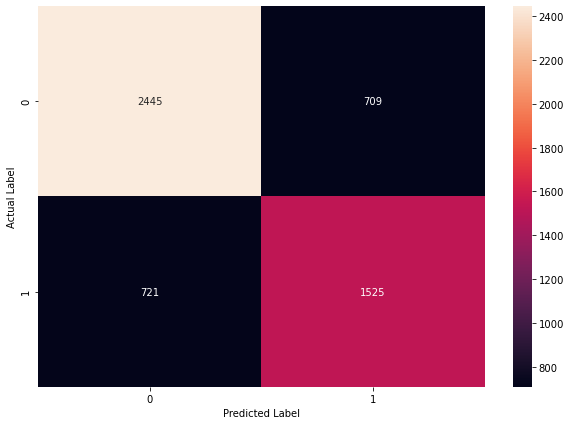

In [20]:
# Compute confusion matrix
matrix = confusion_matrix(y_val, rf_yhat)

# Create matrxi df
matrix_df = pd.DataFrame(matrix, index=(0, 1), columns=(0, 1))

# Visualize confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g")

# Add metadata
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label") 
plt.show()

**Summary:**

- Accuracy of 73% is not very high but good enough.
- Of all predicted positives, 68% correct (precision) which is good, meaning there are 2/3 of users are correctly detected as leavers.
- Of all users leaving, the model detect 68% of them (recall) which is a better performance considering our objective to detect leavers.